In [9]:
import tensorflow as tf
from os import path, getcwd, chdir
import numpy as np
import matplotlib.pyplot as plt

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = "mnist.npz"

## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [37]:
# GRADED FUNCTION: train_mnist

# Please write your code only where you are indicated.
# please do not remove # model fitting inline comments.

# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
    #creating a callback function that activates if the accuracy is greater than 60%
        if(logs.get('accuracy')>0.99):
            print("\nim maxed out baby, too goated!")
            self.model.stop_training = True
# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

# YOUR CODE SHOULD START HERE
callbacks = myCallback()
x_train = x_train / 255.0
x_test = x_test / 255.0

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
    # YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    # YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model fitting
history = model.fit(# YOUR CODE SHOULD START HERE
    x_train, y_train, epochs=10, callbacks=[callbacks]
          # YOUR CODE SHOULD END HERE
)
model.evaluate(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2050 - accuracy: 0.9384
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0866 - accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0592 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0376 - accuracy: 0.9879
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9902
im maxed out baby, too goated!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9951


[0.014892439357936382, 0.995116651058197]

In [38]:
predictions = model.predict(x_test)
class_names = [0,1,2,3,4,5,6,7,8,9]
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [39]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])  
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

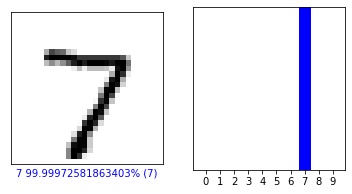

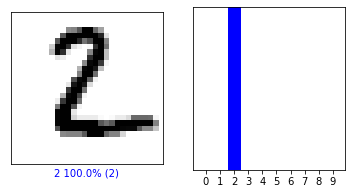

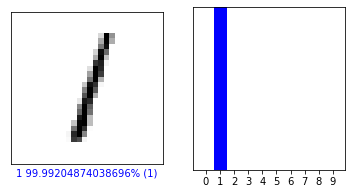

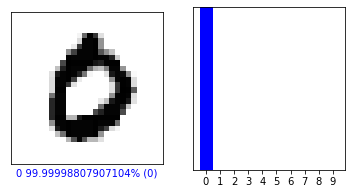

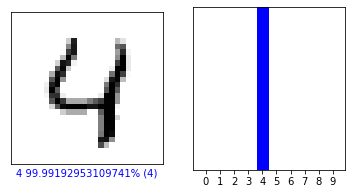

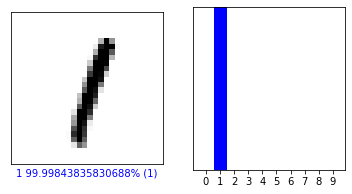

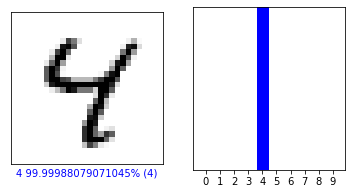

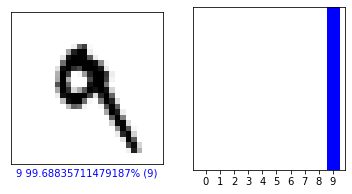

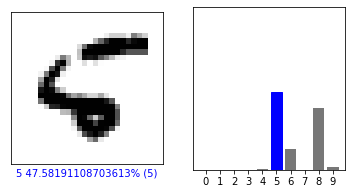

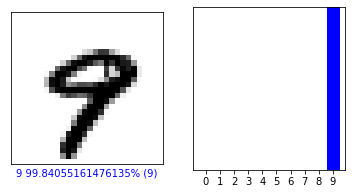

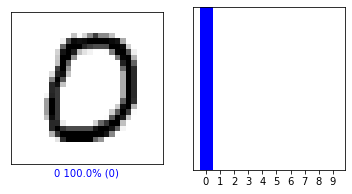

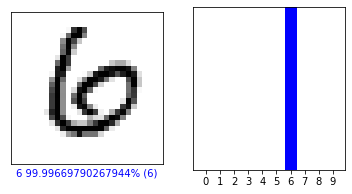

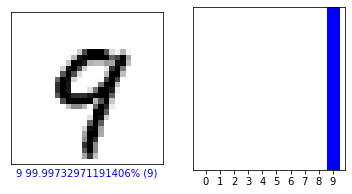

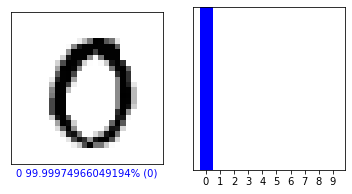

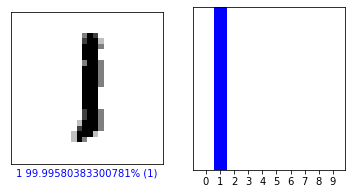

In [40]:
for i in range(15):
	plt.figure(figsize=(6,3))
	plt.subplot(1,2,1)
	plot_image(i, predictions[i], y_test, x_test)
	plt.subplot(1,2,2)
	plot_value_array(i, predictions[i],  y_test)
	plt.show()